<a href="https://colab.research.google.com/github/hydu0016/Pytorch_Udemy/blob/main/01_pytorch_workflow_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

device(type='cuda', index=0)

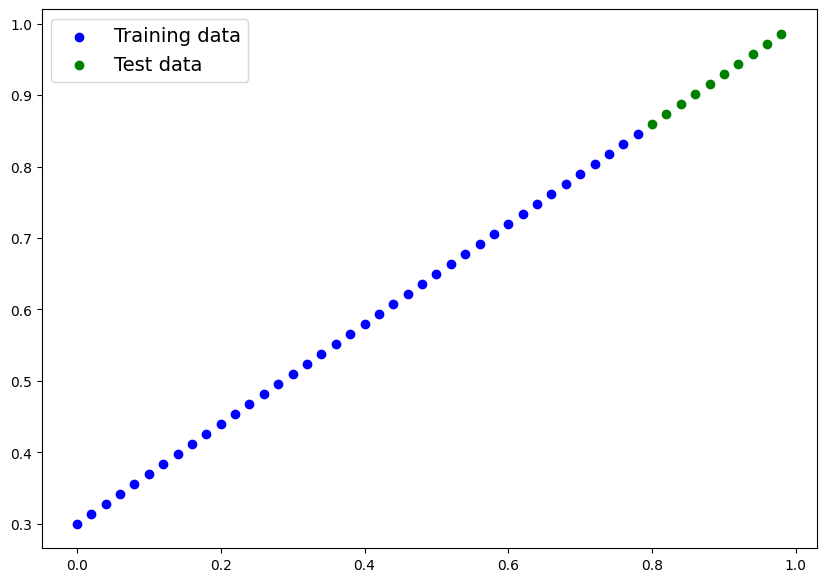

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


weight= 0.7
bias=0.3

X=torch.arange(0,1,0.02).unsqueeze(dim=1)
y=X*weight+bias
split=(int)(0.8*len(X))

X_train=X[:split]
y_train=y[:split]
X_test=X[split:]
y_test=y[split:]

len(X_train),len(y_train),len(X_test),len(y_test)

device="cuda" if torch.cuda.is_available() else "cpu"
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)

def plot_predictions(train_data=X_train,trian_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data.cpu(),trian_labels.cpu(),c="b",label="Training data")
  plt.scatter(test_data.cpu(),test_labels.cpu(),c="g",label="Test data")
  if predictions!=None:
    plt.scatter(test_data.cpu(),predictions.cpu(),c="r",label="predictions")

  plt.legend(prop={"size":14});

plot_predictions()


X_train.device

In [ ]:
#Picking a Model

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,out_features=1)

  def forward(self,X:torch.Tensor)->torch.Tensor:
    return self.linear_layer(X)

torch.manual_seed(42)
model_1=LinearRegressionModel()
model_1,model_1.state_dict()



(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
next(model_1.parameters()).device

model_1.to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
##Training

loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [ ]:
torch.manual_seed(42)

epoches=1000

for epoch in range(epoches):
  model_1.train()

  y_pred=model_1(X_train)

  loss=loss_fn(y_pred,y_train)

  optimizer.zero_grad()

  loss.backward()
  optimizer.step()

  ##Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(X_test)
    test_loss=loss_fn(test_pred,y_test)

  if epoch%100==0:
    print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")




Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882


In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

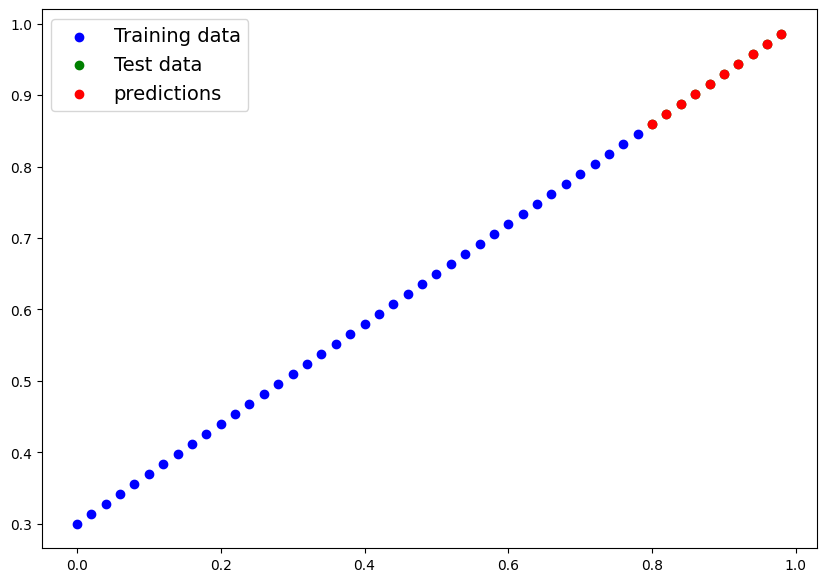

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)



Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModel()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0
